<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-is-a-convolution?" data-toc-modified-id="What-is-a-convolution?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What is a convolution?</a></span></li><li><span><a href="#Are-all-libraries-that-are-needed-available?" data-toc-modified-id="Are-all-libraries-that-are-needed-available?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Are all libraries that are needed available?</a></span></li><li><span><a href="#Load-an-example-image-and-display-it" data-toc-modified-id="Load-an-example-image-and-display-it-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load an example image and display it</a></span></li><li><span><a href="#Building-a-small-Keras-model-with-a-single-CONV-layer" data-toc-modified-id="Building-a-small-Keras-model-with-a-single-CONV-layer-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Building a small Keras model with a single CONV layer</a></span></li><li><span><a href="#Get-and-show-the-random-initialized-weights" data-toc-modified-id="Get-and-show-the-random-initialized-weights-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Get and show the random initialized weights</a></span></li></ul></div>

# What is a convolution?

This notebook shall help to answer this question.

# Are all libraries that are needed available?

In [6]:
import numpy as np
import tensorflow as tf
import keras
import cv2
import matplotlib.pyplot as plt

print( "Your NumPy version is: " + np.__version__ )
print( "Your TensorFlow version is: " + tf.__version__)
print( "Your Keras version is: " + keras.__version__ )
print( "Your OpenCV version is: " + cv2.__version__ )

Your NumPy version is: 1.13.3
Your TensorFlow version is: 1.5.1
Your Keras version is: 2.2.3
Your OpenCV version is: 3.4.1


# Load an example image and display it

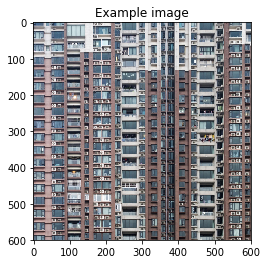

In [9]:
IMG_SIZE = (600,600)

filename = "data\skyscraper.jpg"
image = cv2.imread(filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, IMG_SIZE)
image = image * (1.0 / 255.0)
plt.imshow(image)
plt.title("Example image")
plt.show()

# Building a small Keras model with a single CONV layer

In [13]:
from keras.models import Sequential
from keras import layers
from keras import backend as K
from keras.layers.convolutional import Conv2D

NR_IMG_CHANNELS = image.ndim
HYPPARAM_NR_FILTER = 2
HYPPARAM_KERNEL_SIDE_LEN=3
HYPPARAM_KERNEL_STRIDE = 1
THE_INPUT_SHAPE = (IMG_SIZE[0], IMG_SIZE[1], NR_IMG_CHANNELS)

K.clear_session()

model = Sequential()

model.add(Conv2D(HYPPARAM_NR_FILTER,
                 kernel_size=(HYPPARAM_KERNEL_SIDE_LEN,
                              HYPPARAM_KERNEL_SIDE_LEN),
                 strides=(HYPPARAM_KERNEL_STRIDE,
                          HYPPARAM_KERNEL_STRIDE),
                 activation='linear',
                 input_shape=THE_INPUT_SHAPE))

model.summary()

model.compile(loss='mean_squared_error', optimizer='sgd')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 598, 598, 2)       56        
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________


# Get and show the random initialized weights